# Docter Fees Consultation Project

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [217]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
d = pd.read_excel('C:/Users/Aayushi Lashkari/Downloads/Doctor_fee_consultation/Final Participant Data Folder/Final_Train.xlsx')

In [4]:
df = pd.DataFrame(d)

In [5]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


Total 5961 rows are there

All the columns are in correct datatypes

3 columns have null values

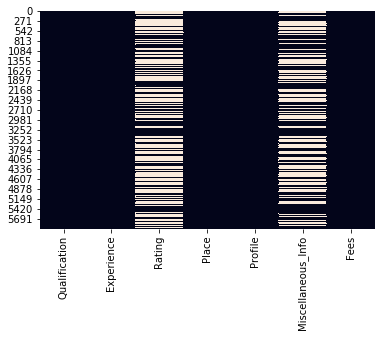

In [7]:
sns.heatmap(df.isnull(),cbar=False)

It seems that about 50% of the rows in Rating and Miscellenous have null values

In [8]:
features_with_null = [i for i in df if df[i].isnull().sum()>=1]

In [9]:
for f in features_with_null:
    print(f,df[f].isnull().sum(),df[f].isnull().mean())

Rating 3302 0.5539339037074317
Place 25 0.004193927193423922
Miscellaneous_Info 2620 0.439523569870827


In Rating 3302 (55%) values are null

Place : 25 (0.4%) values are null

Miscellaneous  : 2620 (43%) values are null

In [10]:
df['Miscellaneous_Info'] = np.where(df['Miscellaneous_Info'].isnull(),'Missing_info',df['Miscellaneous_Info'])

In [11]:
df['Rating'] = np.where(df['Rating'].isnull(),'Missing_Rating',df['Rating'])

In [12]:
df['Place'] = np.where(df['Place'].isnull(),df['Place'].mode(),df['Place'])

Replacing place with the mode

And creating new categories in rating and miscellaneous info

In [13]:
categorical_feat = df.drop('Fees',axis=1)

sepearated categorical features

In [33]:
for i in categorical_feat:
    print(i)
    print(df[i].unique())
    print('------------------------------------')

Qualification
['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']
------------------------------------
Experience
['24 years experience' '12 years experience' '9 years experience'
 '20 years experience' '8 years experience' '42 years experience'
 '10 years experience' '14 years experience' '23 years experience'
 '5 years experience' '7 years experience' '21 years experience'
 '19 years experience' '41 years experience' '31 years experience'
 '25 years experience' '16 years experience' '15 years experience'
 '11 years experience' '22 years experience' '38 years experience'
 '6 years experience' '36 years experience' '13 years experience'
 '18 years experience' '46 years experience' '40 years experience

In [50]:
sum_delhi=0
count_d=0
for i,j in zip(df['Place'],df['Fees']):
    if('Delhi' in i):
        sum_delhi = sum_delhi+j
        count_d = count_d+1
print('Sum of the fees of docters in delhi',sum_delhi)
print('mean of fees',sum_delhi/count_d)
print('number of docters in delhi',count_d)



Sum of the fees of docters in delhi 430050
mean of fees 362.9113924050633
number of docters in delhi 1185


In [52]:
sum_bangalore=0
count_b=0
for i,j in zip(df['Place'],df['Fees']):
    if('Bangalore' in i):
        sum_bangalore = sum_bangalore+j
        count_b = count_b+1
print('Sum of the fees of docters in bangalore',sum_bangalore)
print('mean of fees',sum_bangalore/count_b)
print('number of docters in bangalore',count_b)


Sum of the fees of docters in bangalore 416234
mean of fees 324.4224473889322
number of docters in bangalore 1283


In [53]:
sum_mum=0
count_m=0
for i,j in zip(df['Place'],df['Fees']):
    if('Mumbai' in i):
        sum_mum = sum_mum+j
        count_m = count_m+1
print('Sum of the fees of docters in mumbai',sum_mum)
print('mean of fees',sum_mum/count_m)
print('number of docters in mum',count_m)


Sum of the fees of docters in mumbai 375809
mean of fees 308.29286300246105
number of docters in mum 1219


In [55]:
sum_chennai=0
count_ch=0
for i,j in zip(df['Place'],df['Fees']):
    if('Chennai' in i):
        sum_chennai = sum_chennai+j
        count_ch = count_ch+1
print('Sum of the fees of docters inchennai ',sum_chennai)
print('mean of fees',sum_chennai/count_ch)
print('number of docters in chennai',count_ch)


Sum of the fees of docters inchennai  242480
mean of fees 283.60233918128654
number of docters in chennai 855


In [56]:
sum_hyd=0
count_h=0
for i,j in zip(df['Place'],df['Fees']):
    if('Hyderabad' in i):
        sum_hyd = sum_hyd+j
        count_h = count_h+1
print('Sum of the fees of docters on Hyderabad',sum_hyd)
print('mean of fees',sum_hyd/count_h)
print('number of docters in hyderabad',count_h)


Sum of the fees of docters on Hyderabad 292440
mean of fees 307.5078864353312
number of docters in hyderabad 951


In [58]:
sum_Ernakulam=0
count_er=0
for i,j in zip(df['Place'],df['Fees']):
    if('Ernakulam' in i):
        sum_Ernakulam = sum_Ernakulam+j
        count_er = count_er+1
print('Sum of the fees of docters in Ernakulam',sum_Ernakulam)
print('mean of fees',sum_Ernakulam/count_er)
print('number of docters in  Ernakulam',count_er)


Sum of the fees of docters in Ernakulam 28830
mean of fees 188.4313725490196
number of docters in  Ernakulam 153


In [59]:
sum_coim=0
count_c=0
for i,j in zip(df['Place'],df['Fees']):
    for k in cities:
        if(k in i):
            sum_coim = sum_coim+j
            count_c = count_c+1
print('Sum of the fees of docters in coimbatore ',sum_coim)
print('mean of fees',sum_coim/count_c)
print('number of docters in coimbatore',count_c)


Sum of the fees of docters in coimbatore  1821023
mean of fees 310.01413006469187
number of docters in coimbatore 5874


# Number of docters on the basis on cities and mean and sum of the feees

In [81]:
from sklearn.preprocessing import OrdinalEncoder
ord_en = OrdinalEncoder()

In [83]:
for i in df.columns:
    if(i=='Fees'):
        pass
    else:
        df[i] = ord_en.fit_transform(df[i].values.reshape(-1,1))

# Univariate Analysis

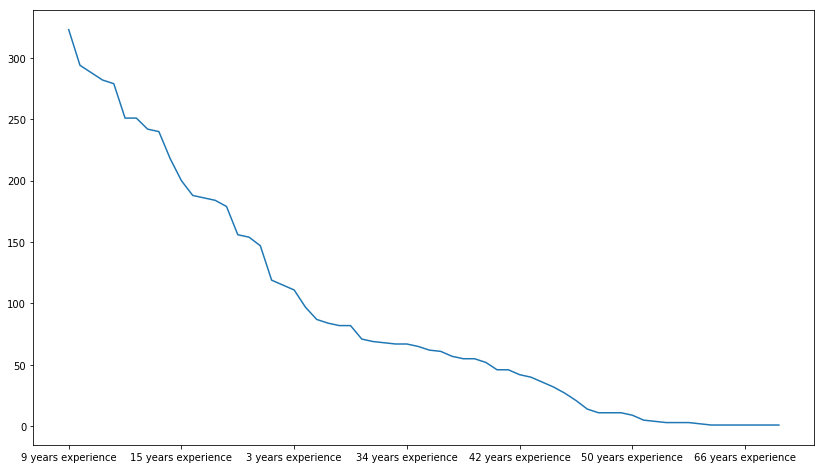

In [229]:
plt.figure(figsize=(14,8))
df__['Experience'].value_counts().plot()

Most of the docters have 9 years of experience

And least number have 66 years experience

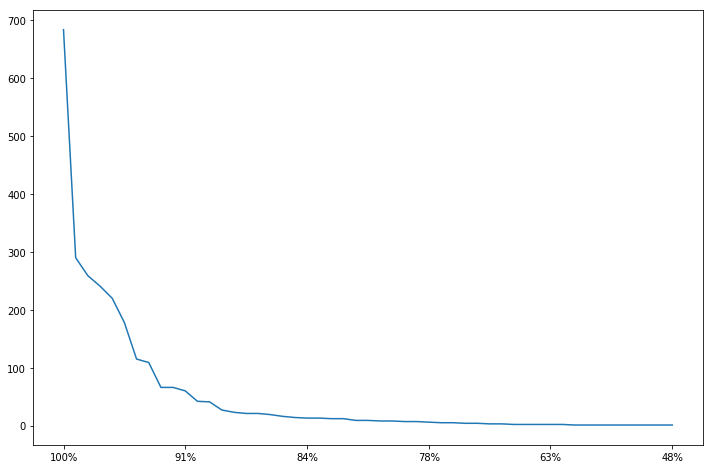

In [198]:
plt.figure(figsize=(12,8))
df__['Rating'].value_counts().plot()

Maximum docters got 100% ratings

Minimum ratings are 48% 

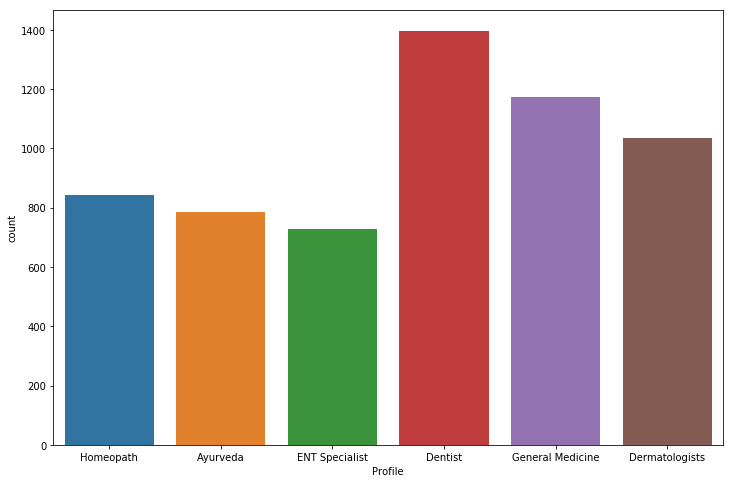

In [200]:
plt.figure(figsize=(12,8))
sns.countplot(df__['Profile'])

Most frequent profile is dentist

And least profile is ENT

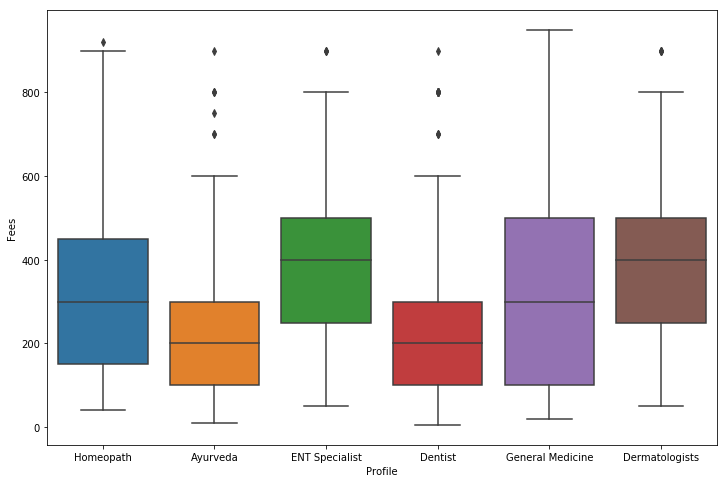

In [231]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Profile',y='Fees',data=df__)

Outliers in the fees of profile: Ayurveda and Dentist

# Bivariate Analysis

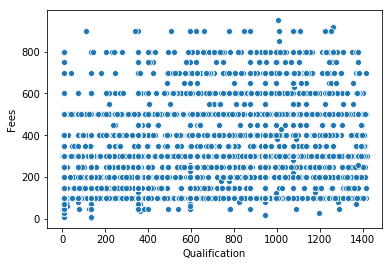

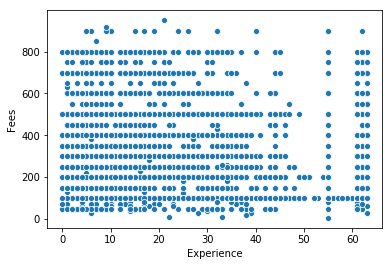

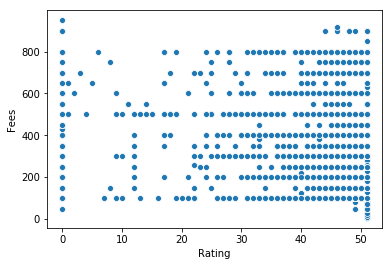

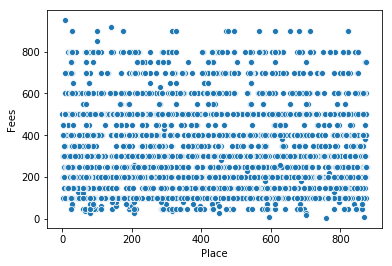

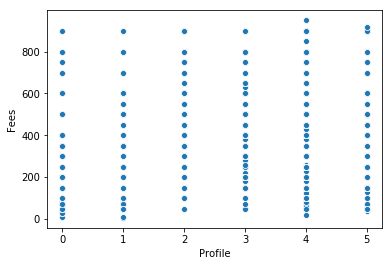

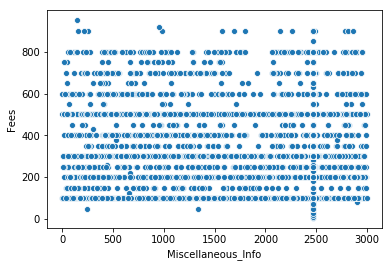

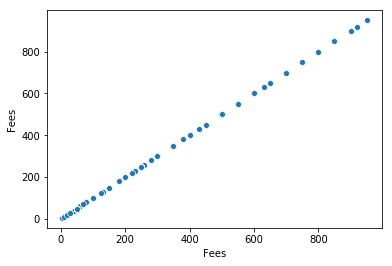

In [87]:
for i in df.columns:
    sns.scatterplot(x=i,y='Fees',data=df)
    plt.show()

Not any specific pattern can be seen in the scatter plot with the target variable

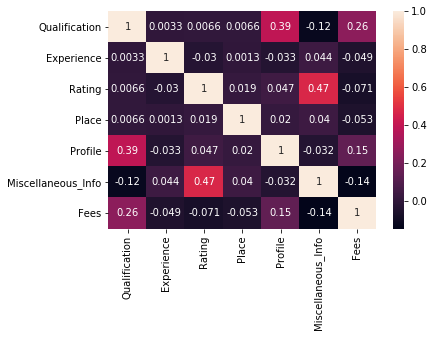

In [90]:
sns.heatmap(df.corr(),annot=True)

Fees has strongest correlation with Qualification

and least corrleation with Place

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()
df_n = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

Dataset after scaling

In [95]:
df_n.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,-0.473306,-0.334883,-2.612465,-0.446253,1.543016,-2.329579,-1.089261
1,-1.265944,-0.955840,0.379506,1.746950,-1.472893,-0.683889,0.220295
2,1.300465,1.910118,0.501627,0.164904,0.336652,0.653553,-0.041616
3,-0.321061,-0.955840,0.501627,-1.339780,-1.472893,-0.336154,-0.303527
4,-1.418189,-0.525947,-2.612465,-0.299266,-1.472893,-2.172907,-0.303527


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [97]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Separating target variable

In [98]:
x = df_n.drop('Fees',axis=1)
y = df_n['Fees']

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=5)

In [100]:
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
mean_squared_error(y_test,pred)

0.9290002125099674

Basic model is giving mse = 0.9

Finding best random_state

In [106]:
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=i)
    lr =  LinearRegression()
    lr.fit(x_train,y_train)
    pred_test = lr.predict(x_test)
    pred_train = lr.predict(x_train)
    if(round(mean_squared_error(pred_test,y_test)*100,1)==round(mean_squared_error(pred_train,y_train)*100,1)):
        print('random state',i)
        print('test mse',mean_squared_error(pred_test,y_test))
        print('train mse',mean_squared_error(pred_train,y_train))

random state 30
test mse 0.9111215929392253
train mse 0.9110241459446916
random state 65
test mse 0.910553449828622
train mse 0.911416442510799
random state 128
test mse 0.911367952330882
train mse 0.9108919752686871
random state 143
test mse 0.9108049315719099
train mse 0.9111886608465316
random state 212
test mse 0.9111025977629799
train mse 0.9113557176285875
random state 375
test mse 0.9110227873092818
train mse 0.9112656191137081
random state 388
test mse 0.911202426873905
train mse 0.9113307397426689
random state 391
test mse 0.9115951567605793
train mse 0.9116069786065274
random state 422
test mse 0.9107370609564505
train mse 0.9113282703661743
random state 434
test mse 0.9107537333735483
train mse 0.9110652813976551
random state 437
test mse 0.9111448527502148
train mse 0.9113785954747268
random state 482
test mse 0.9119485620691594
train mse 0.9118569967492383
random state 753
test mse 0.9112060817732637
train mse 0.9109424886847043
random state 809
test mse 0.9119758719441539

In [108]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=30)

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [113]:
list_algo = [LinearRegression,SVR,KNeighborsRegressor]
for i in list_algo:
    obj = i()
    obj.fit(x_train,y_train)
    pred = obj.predict(x_test)
    print(i,'r2_score',r2_score(y_test,pred))
    print('mean squared error',mean_squared_error(y_test,pred))
    print('rms',np.sqrt(mean_squared_error(y_test,pred)))
    print('------------------------------------------------------------------------')

<class 'sklearn.linear_model._base.LinearRegression'> r2_score 0.09862299732056856
mean squared error 0.9111215929392253
rms 0.9545268948223645
------------------------------------------------------------------------
<class 'sklearn.svm._classes.SVR'> r2_score 0.09624791724342485
mean squared error 0.9135223494892735
rms 0.9557836311055309
------------------------------------------------------------------------
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> r2_score 0.02411712414403011
mean squared error 0.9864329328670737
rms 0.9931933008569247
------------------------------------------------------------------------


Here linear regression is giving best result , moving for the cross_val score

In [114]:
from sklearn.model_selection import cross_val_score
for i in list_algo:
    obj = i()
    obj.fit(x_train,y_train)
    pred = obj.predict(x_test)
    cross_score = cross_val_score(obj,x,y,cv=5)
    print('cross score',cross_score.mean())
    print(i,'r2_score',r2_score(y_test,pred))
    print('mean squared error',mean_squared_error(y_test,pred))
    print('rms',np.sqrt(mean_squared_error(y_test,pred)))
    print('---------')

cross score 0.08611648320854745
<class 'sklearn.linear_model._base.LinearRegression'> r2_score 0.09862299732056856
mean squared error 0.9111215929392253
rms 0.9545268948223645
---------
cross score 0.0896927447414606
<class 'sklearn.svm._classes.SVR'> r2_score 0.09624791724342485
mean squared error 0.9135223494892735
rms 0.9557836311055309
---------
cross score 0.015022793227282416
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> r2_score 0.02411712414403011
mean squared error 0.9864329328670737
rms 0.9931933008569247
---------


SVR is giving best result

For best kernel:

In [120]:
kernel_svm = ['poly','rbf','linear']
for i in kernel_svm:
    obj_ = SVR(kernel=i)
    obj_.fit(x_train,y_train)
    p = obj_.predict(x_test)
    print(i)
    print('mse',mean_squared_error(y_test,p))
    print(r2_score(y_test,p))

poly
mse 0.9691144521375448
0.041250380969374056
rbf
mse 0.9135223494892735
0.09624791724342485
linear
mse 0.9477417448189054
0.06239450378603628


Rbf is giving best result

Ensemble technique

In [118]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
random_obj = RandomForestRegressor(n_estimators=100,random_state=42)

In [123]:
random_obj.fit(x_train,y_train)
p_rf = random_obj.predict(x_test)
mean_squared_error(y_test,p_rf)

0.8503091091538093

In [125]:
hyper_para = {
    'n_estimators':[100,200,300,500],
    'max_depth':[10,20,50],
    'min_samples_leaf':[1,2,5,3]
}

Hyper parametric tuning

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
rfr_obj  = RandomForestRegressor()
grids_ob = GridSearchCV(estimator=rfr_obj,param_grid=hyper_para,cv=5)

In [128]:
grids_ob.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 50],
                         'min_samples_leaf': [1, 2, 5, 3],
                         'n_estimators': [100, 200, 300, 500]})

In [130]:
best_parameters = grids_ob.best_params_
best_score = grids_ob.best_score_
print(best_parameters)
print(best_score)

{'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200}
0.1624538991033589


In [206]:
pred_gridcv = grids_ob.predict(x_test)

Result of final model

In [207]:
print('rscore',r2_score(y_test,pred_gridcv))
print('mse',mean_squared_error(y_test,pred_gridcv))
print('root mse',np.sqrt(mean_squared_error(y_test,pred_gridcv)))


rscore 0.1950213180185062
mse 0.813681131012766
root mse 0.9020427545370374


Saving best model : randomforestregressor after hyper parametric tuning

In [211]:
import pickle

In [215]:
fees = 'fee.pkl'
pickle.dump(grids_ob,open(fees,'wb'))

Text(0.5, 1.0, 'Grid search')

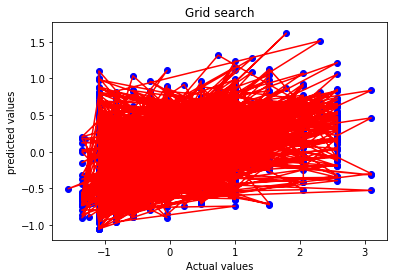

In [219]:
plt.scatter(x=y_test,y=pred_gridcv,color='b')
plt.plot(y_test,pred_gridcv,color='r')
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.title('Grid search')

# Importing test data

In [134]:
d_test = pd.read_excel('C:/Users/Aayushi Lashkari/Downloads/Doctor_fee_consultation (1)/Final Participant Data Folder/Final_Test.xlsx')

In [135]:
df_test = pd.DataFrame(d_test)

In [136]:
df_test.shape

(1987, 6)

In [137]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


Total rows are 1987

Null values are there in place,rating and miscellanous info column

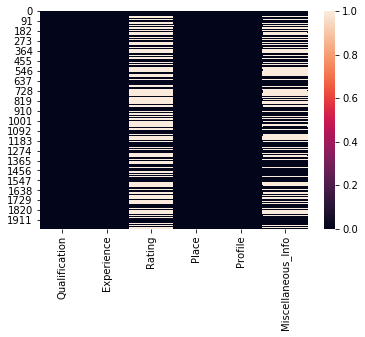

In [138]:
sns.heatmap(df_test.isnull())

In [140]:
for i in df_test.columns:
    print(i,df_test[i].isnull().mean())

Qualification 0.0
Experience 0.0
Rating 0.548565676899849
Place 0.003019627579265224
Profile 0.0
Miscellaneous_Info 0.41972823351786614


54% values are null in rating 

41 % null in miscellaneous 

0.3% null in place

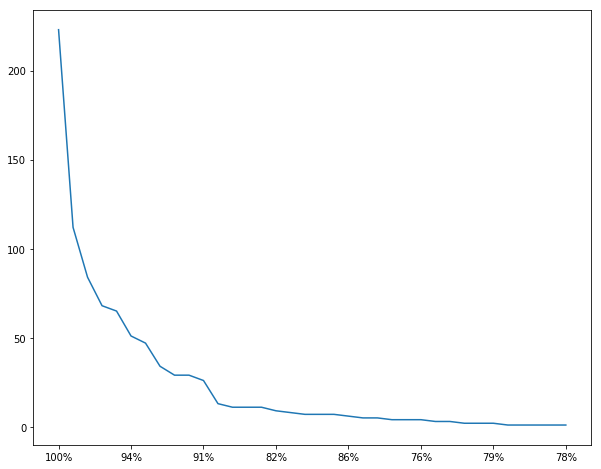

In [150]:
plt.figure(figsize=(10,8))
df_test['Rating'].value_counts().plot()

100% rating is given to most of the docters 

97 to 78% is the least rating given

In [146]:
df_test['Qualification'].unique()

array(['MBBS', 'MBBS, Diploma in Otorhinolaryngology (DLO)', 'MBBS, DDVL',
       'BAMS', 'BDS, MDS - Conservative Dentistry & Endodontics',
       'BDS, MDS', 'BDS, MDS - Pedodontics',
       'MD - Ayurveda Medicine, BAMS, Yoga Teachers Training Course, M. D. IN KAYACHIKISTA',
       'BHMS', 'BDS', 'MBBS, FCD - Diabetology', 'MBBS, DDV',
       'MBBS, MD - Dermatology', 'MS - ENT',
       'MBBS, Diploma in Otorhinolaryngology (DLO), MS - ENT, DNB - ENT, MNAMS (Membership of the National Academy)',
       'BHMS, Diploma in Naturopathy & Yogic Science (DNYS), Diploma in Diet and Nutrition, Diploma in Cosmetology',
       'MBBS, PG Diploma In Clinical Cosmetology (PGDCC)',
       'BDS, MDS - Periodontics', 'BDS, MDS- Oral Pathology',
       'MBBS, MD - General Medicine', 'MS - ENT, MBBS',
       'MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT',
       'MBBS, MS - ENT, DNB - Otorhinolaryngology',
       'BDS, PhD - Endodontics, MDS - Conservative Dentistry & Endodontics',
       'B

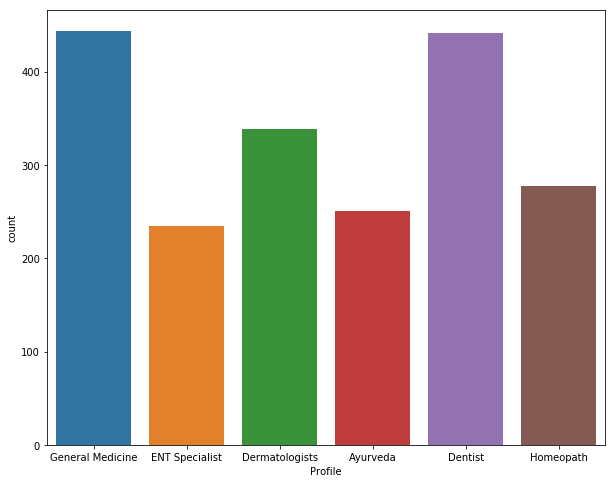

In [149]:
plt.figure(figsize=(10,8))
sns.countplot(df_test['Profile'])

General Medicine and Dentist are most frequent profile

ENT is least frequent profile in the test dataset

In [157]:
m = df_test['Place']
df_test['Place']=df_test['Place'].fillna(m,inplace=True)

Replacing null value in place column with mode

And creating new categories in rating and miscellaneous columns

In [172]:
m= df_test['Place'].mode()
print(m)

0    Andheri West, Mumbai
1     Mulund West, Mumbai
dtype: object


In [173]:
df_test['Place'] = np.where(df_test['Place'].isnull(),'Andheri West, Mumbai',df_test['Place'])

In [174]:
df_test['Rating'] = np.where(df_test['Rating'].isnull(),'Missing_Rating',df_test['Rating'])

In [175]:
df_test['Miscellaneous_Info'] = np.where(df_test['Miscellaneous_Info'].isnull(),'Missing_info',df_test['Miscellaneous_Info'])

In [176]:
df_test.isnull().sum()

Qualification         0
Experience            0
Rating                0
Profile               0
Miscellaneous_Info    0
Place                 0
dtype: int64

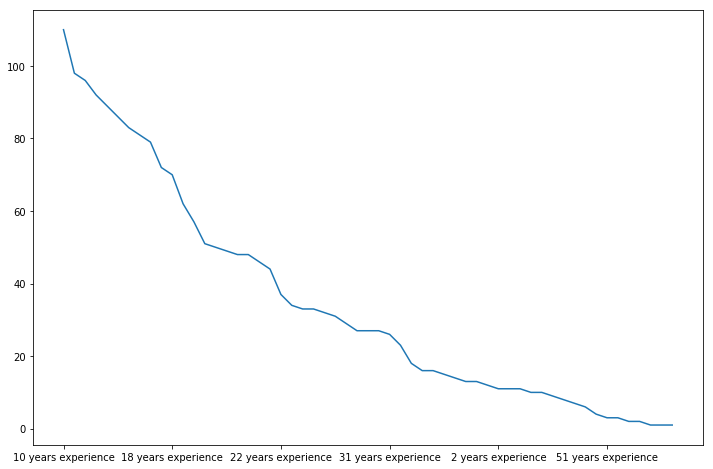

In [183]:
plt.figure(figsize=(12,8))
df_test['Experience'].value_counts().plot()

Maximum docters have 10 years experience

Least number of docters have 51 years of experience

In [184]:
ord_obj = OrdinalEncoder()
for i in df_test.columns:
    df_test[i] = ord_obj.fit_transform(df_test[i].values.reshape(-1,1))
    

In [185]:
df_test.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Place
0,241.0,28.0,36.0,4.0,910.0,142.0
1,340.0,24.0,36.0,3.0,910.0,580.0
2,258.0,34.0,9.0,2.0,153.0,212.0
3,6.0,0.0,36.0,0.0,910.0,374.0
4,79.0,7.0,0.0,1.0,816.0,231.0


In [186]:
df_test_new = pd.DataFrame(scaler.fit_transform(df_test),columns=df_test.columns)

Dataset after scaling

In [228]:
df_test_new.head(3)

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Place
0,-0.102089,0.325858,0.551066,0.901673,0.696899,-0.843975
1,0.430414,0.112731,0.551066,0.297007,0.696899,1.672536
2,-0.010649,0.645548,-1.752155,-0.307658,-1.868656,-0.441793


Loading saved model to predict the test data

In [226]:
load_model  = pickle.load(open(fees,'rb'))

In [227]:
load_model.predict(df_test_new)

array([ 0.06413357,  0.09105393, -0.31235347, ...,  0.22358913,
       -0.06267914, -0.13464404])